In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Input data
x = np.array([1, 3, 6, 8, 9, 10])
y = np.array([5, 7.3, 15.2, 19.5, 20.5, 23 ])


In [ ]:
# # Scaling x
x_max = np.max(x)
x_min = np.min(x)
x_scaled = (x-x_min)/(x_max-x_min)
x = x_scaled

In [ ]:
# Parameters
# learning_rate = 0.01
# n_iterations = 3

# # Parameters
learning_rate = 0.02
n_iterations = 1000

# # Parameters
# learning_rate = 0.0205
# n_iterations = 300

# learning_rate = 0.02
# n_iterations = 3000

# Initial guesses for a and b
a = 0.0
b = 0.0

In [ ]:

# Number of data points
m = len(x)

# Lists to store values for each iteration
a_history = []
b_history = []
cost_history = []
da_history = []
db_history = []
res_history = []

# Gradient Descent
for i in range(n_iterations):
    y_pred = a * x + b  # Predicted y values

    # Compute the cost function (Mean Squared Error)
    cost = (1/m) * np.sum((y - y_pred) ** 2)

    # Compute the gradients
    da = (-2/m) * np.sum(x * (y - y_pred))  # Derivative w.r.t a
    db = (-2/m) * np.sum(y - y_pred)        # Derivative w.r.t b

    # Store the current values
    a_history.append(a)
    b_history.append(b)
    cost_history.append(cost)
    da_history.append(da)
    db_history.append(db)


    # Update the parameters
    a = a - learning_rate * da
    b = b - learning_rate * db

# Create a DataFrame to hold the iteration data
df = pd.DataFrame({
    'Iteration': range(1, n_iterations+1),
    'a': a_history,
    'b': b_history,
    'Cost (MSE)': cost_history,
    'da': da_history,
    'db': db_history
})

print(df)



     Iteration          a         b  Cost (MSE)         da         db
0            1   0.000000  0.000000  273.138333 -22.151852 -30.166667
1            2   0.443037  0.603333  245.884660 -21.052563 -28.451328
2            3   0.864088  1.172360  221.511113 -20.012839 -26.829846
3            4   1.264345  1.708957  199.712068 -19.029433 -25.297098
4            5   1.644934  2.214899  180.214342 -18.099272 -23.848242
..         ...        ...       ...         ...        ...        ...
995        996  18.435175  4.515776    0.455724  -0.049195   0.031198
996        997  18.436159  4.515152    0.455656  -0.049008   0.031080
997        998  18.437140  4.514531    0.455589  -0.048822   0.030962
998        999  18.438116  4.513911    0.455522  -0.048637   0.030845
999       1000  18.439089  4.513294    0.455456  -0.048453   0.030728

[1000 rows x 6 columns]


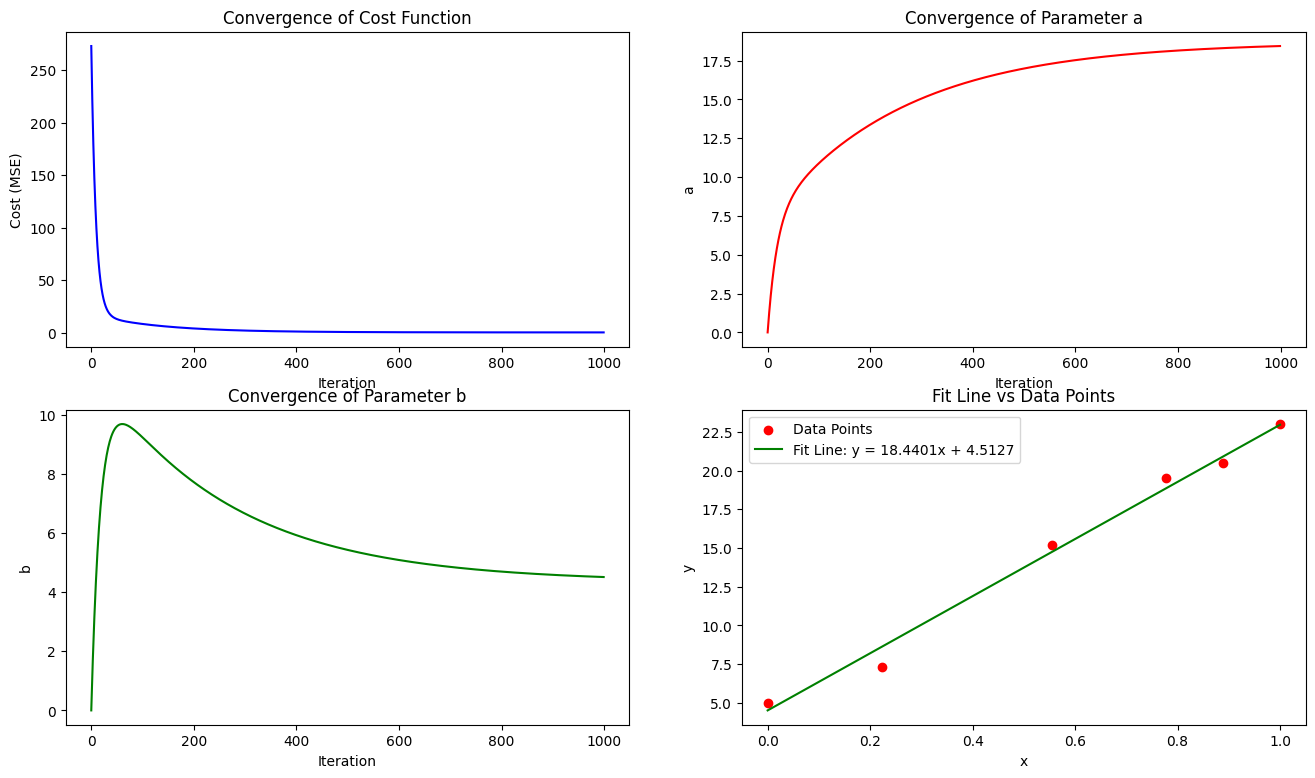

In [ ]:
# Plotting the convergence of the cost function
plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.plot(range(n_iterations), cost_history, color='blue')
plt.title('Convergence of Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')

# Plotting the convergence of a
plt.subplot(2, 2, 2)
plt.plot(range(n_iterations), a_history, color='red')
plt.title('Convergence of Parameter a')
plt.xlabel('Iteration')
plt.ylabel('a')

# Plotting the convergence of b
plt.subplot(2, 2, 3)
plt.plot(range(n_iterations), b_history, color='green')
plt.title('Convergence of Parameter b')
plt.xlabel('Iteration')
plt.ylabel('b')

# Plotting the fit curve
plt.subplot(2, 2, 4)
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, a * x + b, color='green', label=f'Fit Line: y = {a:.4f}x + {b:.4f}')
plt.title('Fit Line vs Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
# Create a meshgrid for a and b
a_vals = np.arange(-1, 3.0, 0.1)
b_vals = np.arange(-1, 3.0, 0.1)
A, B = np.meshgrid(a_vals, b_vals)

# Compute the cost function over the grid
J = np.zeros_like(A)
for i in range(len(a_vals)):
    for j in range(len(b_vals)):
        y_pred = A[i, j] * x + B[i, j]
        J[i, j] = (1/m) * np.sum((y - y_pred) ** 2)


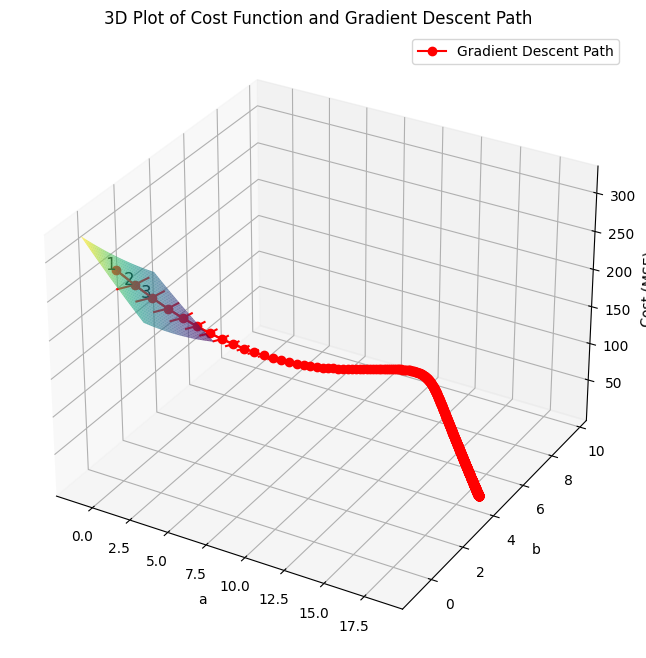

In [ ]:

# Plotting the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, J, cmap='viridis', alpha=0.7)

# Plotting the gradient descent path
ax.plot(a_history, b_history, cost_history, 'r-o', label='Gradient Descent Path')

# Annotate the first three steps
for i in range(3):
    ax.text(a_history[i], b_history[i], cost_history[i], f'{i+1}', color='black', fontsize=12, ha='right')

# Add arrows indicating direction
for i in range(1, len(a_history)):
    ax.quiver(a_history[i-1], b_history[i-1], cost_history[i-1],
              a_history[i] - a_history[i-1], b_history[i] - b_history[i-1], cost_history[i] - cost_history[i-1],
              arrow_length_ratio=0.1, color='red')

# Labels and title
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Cost (MSE)')
ax.set_title('3D Plot of Cost Function and Gradient Descent Path')
ax.legend()

# Show the plot
plt.show()

In [ ]:
import plotly.graph_objs as go

# Create the surface plot
surface = go.Surface(z=J, x=A, y=B, colorscale='Turbo', opacity=0.8)

# Create the gradient descent path
path = go.Scatter3d(x=a_history, y=b_history, z=cost_history,
                    mode='lines+markers',
                    line=dict(color='red', width=4),
                    marker=dict(size=5, color='red'))

# Create annotations for the first three steps
annotations = [dict(showarrow=True,
                    x=a_history[i],
                    y=b_history[i],
                    z=cost_history[i],
                    text=f'{i+1}',
                    arrowhead=2,
                    ax=-20, ay=-20,
                    font=dict(color='black', size=12))
               for i in range(3)]

# Create the 3D plot with a larger size
fig = go.Figure(data=[surface, path])
fig.update_layout(scene=dict(xaxis_title='a', yaxis_title='b', zaxis_title='Cost (MSE)',
                             annotations=annotations),
                  title='3D Plot of Cost Function and Gradient Descent Path',
                  width=1200,  # Increase the width
                  height=900)  # Increase the height

# Show the plot
fig.show()

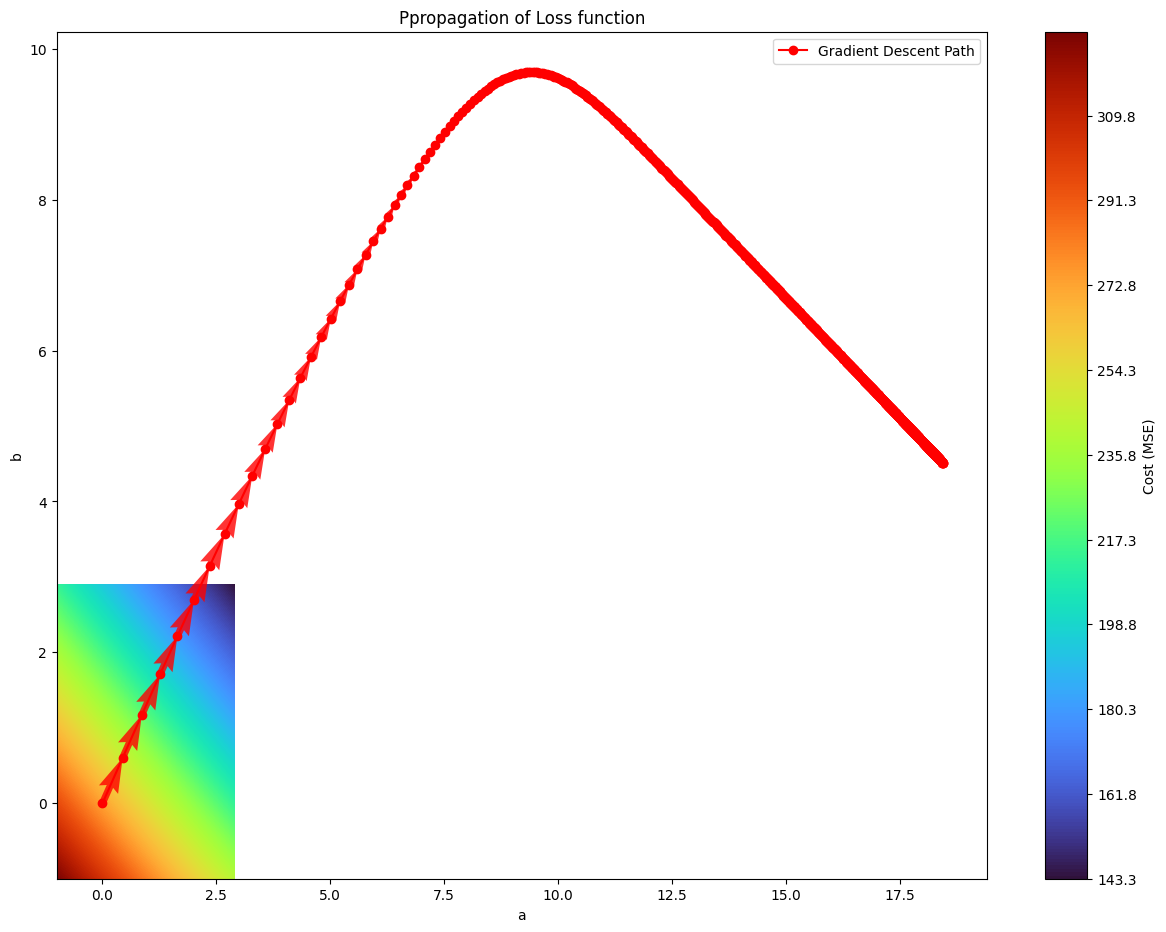

In [ ]:

# Plotting the filled color contour
plt.figure(figsize=(15, 11))
contour = plt.contourf(A, B, J, levels=2000, cmap='turbo')
plt.colorbar(contour, label='Cost (MSE)')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Ppropagation of Loss function')

# Overlay the gradient descent path
plt.plot(a_history, b_history, 'r-o', label='Gradient Descent Path')

# Add arrows to indicate the direction of the gradient descent
for i in range(len(a_history) - 1):
    plt.quiver(a_history[i], b_history[i],
               a_history[i+1] - a_history[i], b_history[i+1] - b_history[i],
               angles='xy', scale_units='xy', scale=1, color='r', alpha=0.8)

plt.legend()

# Show the plot
plt.show()
